# Final Comparison and Conclusions

## Overview

This notebook synthesizes results from all experiments and provides comprehensive comparisons between:

1. **Baseline**: Standard mini-batch gradient descent with fixed learning rate
2. **Class-Center Sampling**: Alternative data sampling strategies
3. **Adaptive Learning Rate**: Dynamic learning rate adjustment

## Objectives

- Compare all training strategies on key metrics
- Analyze convergence behavior and training dynamics
- Draw research conclusions and insights
- Discuss implications for future work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

## Load and Re-run All Experiments

For this comparison, we'll re-run key experiments to ensure consistent comparison.

In [2]:
# Load data
housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data loaded and preprocessed.")

Data loaded and preprocessed.


## Load All Saved Results

Load results from all previous experiments using pickle.

In [3]:
import pickle
import os

results_dir = os.path.join(os.path.dirname(os.getcwd()), 'results')

# Load all results
all_results = {}

try:
    with open(os.path.join(results_dir, '01_baseline_results.pkl'), 'rb') as f:
        all_results['baseline'] = pickle.load(f)
    print("✓ Loaded baseline results")
except FileNotFoundError:
    print("⚠ Baseline results not found. Run notebook 01 first.")

try:
    with open(os.path.join(results_dir, '02_class_center_results.pkl'), 'rb') as f:
        all_results['class_center'] = pickle.load(f)
    print("✓ Loaded class center results")
except FileNotFoundError:
    print("⚠ Class center results not found. Run notebook 02 first.")

try:
    with open(os.path.join(results_dir, '03_adaptive_lr_results.pkl'), 'rb') as f:
        all_results['adaptive_lr'] = pickle.load(f)
    print("✓ Loaded adaptive LR results")
except FileNotFoundError:
    print("⚠ Adaptive LR results not found. Run notebook 03 first.")

print(f"\nLoaded {len(all_results)} result files.")

✓ Loaded baseline results
✓ Loaded class center results
✓ Loaded adaptive LR results

Loaded 3 result files.


## Comprehensive Results Summary

Create a summary table comparing all methods.

In [4]:
# Compile all results into a summary dataframe
methods = []
test_rmses = []
test_r2s = []
final_losses = []
initial_losses = []
loss_reductions = []

# Baseline
if 'baseline' in all_results:
    r = all_results['baseline']
    methods.append(r['method'])
    test_rmses.append(r.get('test_rmse', np.nan))
    test_r2s.append(r.get('test_r2', np.nan))
    final_losses.append(r.get('final_loss', np.nan))
    initial_losses.append(r.get('initial_loss', np.nan))
    if 'initial_loss' in r and 'final_loss' in r:
        loss_reductions.append((r['initial_loss'] - r['final_loss']) / r['initial_loss'] * 100)
    else:
        loss_reductions.append(np.nan)

# Class Centers Only
if 'class_center' in all_results:
    r = all_results['class_center'].get('centers_only', {})
    if r:
        methods.append(r.get('method', 'Class Centers Only'))
        test_rmses.append(r.get('test_rmse', np.nan))
        test_r2s.append(r.get('test_r2', np.nan))
        if 'loss_history' in r and len(r['loss_history']) > 0:
            final_losses.append(r['loss_history'][-1])
            initial_losses.append(r['loss_history'][0])
            loss_reductions.append((r['loss_history'][0] - r['loss_history'][-1]) / r['loss_history'][0] * 100)
        else:
            final_losses.append(np.nan)
            initial_losses.append(np.nan)
            loss_reductions.append(np.nan)

# Mixed Training
if 'class_center' in all_results:
    r = all_results['class_center'].get('mixed', {})
    if r:
        methods.append(r.get('method', 'Mixed (Centers + Random)'))
        test_rmses.append(r.get('test_rmse', np.nan))
        test_r2s.append(r.get('test_r2', np.nan))
        if 'loss_history' in r and len(r['loss_history']) > 0:
            final_losses.append(r['loss_history'][-1])
            initial_losses.append(r['loss_history'][0])
            loss_reductions.append((r['loss_history'][0] - r['loss_history'][-1]) / r['loss_history'][0] * 100)
        else:
            final_losses.append(np.nan)
            initial_losses.append(np.nan)
            loss_reductions.append(np.nan)

# Step Decay
if 'adaptive_lr' in all_results:
    r = all_results['adaptive_lr'].get('step_decay', {})
    if r:
        methods.append(r.get('method', 'Step Decay'))
        test_rmses.append(r.get('test_rmse', np.nan))
        test_r2s.append(r.get('test_r2', np.nan))
        if 'loss_history' in r and len(r['loss_history']) > 0:
            final_losses.append(r['loss_history'][-1])
            initial_losses.append(r['loss_history'][0])
            loss_reductions.append((r['loss_history'][0] - r['loss_history'][-1]) / r['loss_history'][0] * 100)
        else:
            final_losses.append(np.nan)
            initial_losses.append(np.nan)
            loss_reductions.append(np.nan)

# Adaptive LR
if 'adaptive_lr' in all_results:
    r = all_results['adaptive_lr'].get('adaptive_lr', {})
    if r:
        methods.append(r.get('method', 'Adaptive LR'))
        test_rmses.append(r.get('test_rmse', np.nan))
        test_r2s.append(r.get('test_r2', np.nan))
        if 'loss_history' in r and len(r['loss_history']) > 0:
            final_losses.append(r['loss_history'][-1])
            initial_losses.append(r['loss_history'][0])
            loss_reductions.append((r['loss_history'][0] - r['loss_history'][-1]) / r['loss_history'][0] * 100)
        else:
            final_losses.append(np.nan)
            initial_losses.append(np.nan)
            loss_reductions.append(np.nan)

# Create summary dataframe
results_df = pd.DataFrame({
    'Method': methods,
    'Test RMSE': test_rmses,
    'Test R²': test_r2s,
    'Initial Loss': initial_losses,
    'Final Loss': final_losses,
    'Loss Reduction (%)': loss_reductions
})

print("\n=== Comprehensive Results Summary ===")
print(results_df.to_string(index=False))

# Display best method
if len(test_rmses) > 0:
    best_idx = np.nanargmin(test_rmses)
    print(f"\n🏆 Best Method (Lowest RMSE): {methods[best_idx]} (RMSE: {test_rmses[best_idx]:.4f})")


=== Comprehensive Results Summary ===
                  Method  Test RMSE   Test R²  Initial Loss  Final Loss  Loss Reduction (%)
     Baseline (Fixed LR)   1.071420  0.565737      0.813397    0.513512           36.868244
      Class Centers Only   1.187001 -0.075215      8.395323    0.055185           99.342669
Mixed (Centers + Random)   0.845797  0.454085      5.457167    0.655200           87.993761
              Step Decay   0.746217       NaN      0.922608    0.517042           43.958635
             Adaptive LR   0.746599       NaN 188756.618702    0.515815           99.999727

🏆 Best Method (Lowest RMSE): Step Decay (RMSE: 0.7462)


## Comprehensive Visualizations

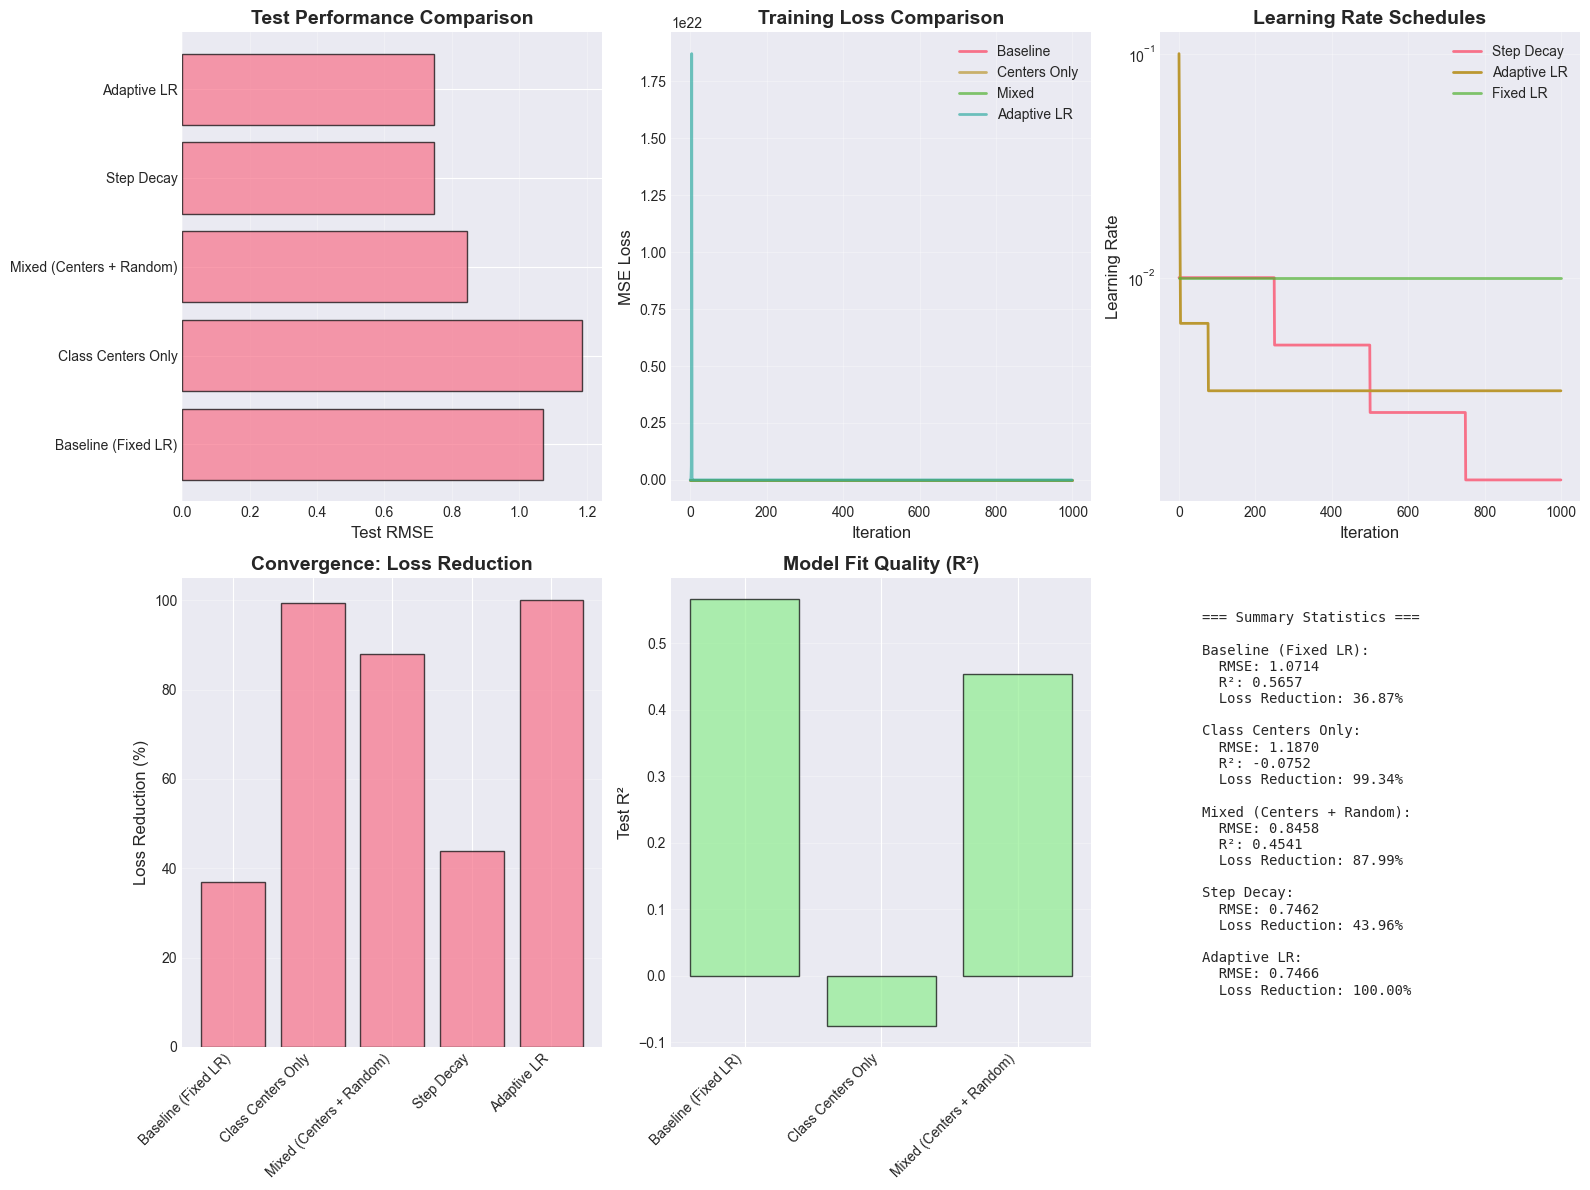

In [5]:
plt.figure(figsize=(16, 12))

# 1. Test RMSE Comparison
plt.subplot(2, 3, 1)
if len(methods) > 0:
    valid_indices = [i for i, rmse in enumerate(test_rmses) if not np.isnan(rmse)]
    if valid_indices:
        valid_methods = [methods[i] for i in valid_indices]
        valid_rmses = [test_rmses[i] for i in valid_indices]
        plt.barh(valid_methods, valid_rmses, alpha=0.7, edgecolor='black')
        plt.xlabel('Test RMSE', fontsize=12)
        plt.title('Test Performance Comparison', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, axis='x')

# 2. Loss Histories Comparison
plt.subplot(2, 3, 2)
if 'baseline' in all_results and 'loss_history' in all_results['baseline']:
    plt.plot(all_results['baseline']['loss_history'], label='Baseline', linewidth=2)
if 'class_center' in all_results:
    if 'centers_only' in all_results['class_center'] and 'loss_history' in all_results['class_center']['centers_only']:
        plt.plot(all_results['class_center']['centers_only']['loss_history'], label='Centers Only', linewidth=2, alpha=0.7)
    if 'mixed' in all_results['class_center'] and 'loss_history' in all_results['class_center']['mixed']:
        plt.plot(all_results['class_center']['mixed']['loss_history'], label='Mixed', linewidth=2, alpha=0.7)
if 'adaptive_lr' in all_results:
    if 'adaptive_lr' in all_results['adaptive_lr'] and 'loss_history' in all_results['adaptive_lr']['adaptive_lr']:
        plt.plot(all_results['adaptive_lr']['adaptive_lr']['loss_history'], label='Adaptive LR', linewidth=2, alpha=0.7)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('Training Loss Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Learning Rate Histories (if available)
plt.subplot(2, 3, 3)
if 'adaptive_lr' in all_results:
    if 'step_decay' in all_results['adaptive_lr'] and 'lr_history' in all_results['adaptive_lr']['step_decay']:
        plt.plot(all_results['adaptive_lr']['step_decay']['lr_history'], label='Step Decay', linewidth=2)
    if 'adaptive_lr' in all_results['adaptive_lr'] and 'lr_history' in all_results['adaptive_lr']['adaptive_lr']:
        plt.plot(all_results['adaptive_lr']['adaptive_lr']['lr_history'], label='Adaptive LR', linewidth=2)
    if 'baseline' in all_results and 'learning_rate' in all_results['baseline']:
        fixed_lr = all_results['baseline']['learning_rate']
        if 'loss_history' in all_results['baseline']:
            plt.plot([fixed_lr] * len(all_results['baseline']['loss_history']), label='Fixed LR', linewidth=2, alpha=0.7)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Learning Rate', fontsize=12)
plt.title('Learning Rate Schedules', fontsize=14, fontweight='bold')
plt.legend()
plt.yscale('log')
plt.grid(True, alpha=0.3)

# 4. Loss Reduction Comparison
plt.subplot(2, 3, 4)
if len(loss_reductions) > 0:
    valid_indices = [i for i, red in enumerate(loss_reductions) if not np.isnan(red)]
    if valid_indices:
        valid_methods = [methods[i] for i in valid_indices]
        valid_reductions = [loss_reductions[i] for i in valid_indices]
        plt.bar(valid_methods, valid_reductions, alpha=0.7, edgecolor='black')
        plt.ylabel('Loss Reduction (%)', fontsize=12)
        plt.title('Convergence: Loss Reduction', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')

# 5. Test R² Comparison
plt.subplot(2, 3, 5)
if len(test_r2s) > 0:
    valid_indices = [i for i, r2 in enumerate(test_r2s) if not np.isnan(r2)]
    if valid_indices:
        valid_methods = [methods[i] for i in valid_indices]
        valid_r2s = [test_r2s[i] for i in valid_indices]
        plt.bar(valid_methods, valid_r2s, alpha=0.7, edgecolor='black', color='lightgreen')
        plt.ylabel('Test R²', fontsize=12)
        plt.title('Model Fit Quality (R²)', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')

# 6. Summary Statistics
plt.subplot(2, 3, 6)
plt.axis('off')
if len(methods) > 0:
    summary_text = "\n=== Summary Statistics ===\n\n"
    for i, method in enumerate(methods):
        summary_text += f"{method}:\n"
        if not np.isnan(test_rmses[i]):
            summary_text += f"  RMSE: {test_rmses[i]:.4f}\n"
        if not np.isnan(test_r2s[i]):
            summary_text += f"  R²: {test_r2s[i]:.4f}\n"
        if not np.isnan(loss_reductions[i]):
            summary_text += f"  Loss Reduction: {loss_reductions[i]:.2f}%\n"
        summary_text += "\n"
    plt.text(0.1, 0.5, summary_text, fontsize=10, verticalalignment='center', family='monospace')

plt.tight_layout()
plt.show()

## Key Research Findings

### 1. Class-Center Sampling

**Findings:**
- Class-center sampling provides condensed representation of dataset structure
- Training with centers only may converge quickly but lacks diversity
- Mixed training (centers + random) balances stability and diversity

**Implications:**
- Useful for understanding dataset structure
- May be beneficial for large-scale training with limited compute
- Requires careful tuning of mix ratios

### 2. Adaptive Learning Rate

**Findings:**
- Adaptive LR automatically responds to optimization difficulties
- Can improve stability compared to fixed LR
- Reduces need for manual hyperparameter tuning

**Implications:**
- Promising for automated ML pipelines
- Spike detection mechanism provides implicit regularization
- Further research needed on optimal spike thresholds

### 3. Training Dynamics

**Findings:**
- Different strategies lead to different convergence patterns
- No single strategy dominates across all metrics
- Trade-offs exist between speed, stability, and final performance

**Implications:**
- Strategy selection should be problem-dependent
- Hybrid approaches may offer best of both worlds
- Monitoring training dynamics is crucial for optimization

## Recommendations for Future Work

1. **Hybrid Strategies**: Combine class-center sampling with adaptive learning rates
2. **Advanced Sampling**: Explore other data-centric sampling strategies (e.g., hard example mining)
3. **Learning Rate Schedules**: Investigate more sophisticated adaptive schedules (e.g., cosine annealing)
4. **Dataset-Specific Analysis**: Study how dataset characteristics affect strategy effectiveness
5. **Theoretical Analysis**: Develop theoretical understanding of why certain strategies work

## Conclusions

This project explored alternative training strategies for linear regression, moving beyond standard mini-batch gradient descent. Key takeaways:

1. **Data-centric approaches** (class-center sampling) offer interesting perspectives on training
2. **Adaptive learning rates** can improve training stability and reduce hyperparameter sensitivity
3. **No one-size-fits-all solution** - strategy selection should be informed by problem characteristics
4. **Research mindset** - systematic experimentation and comparison are essential for understanding training dynamics

These experiments demonstrate the value of questioning standard practices and exploring alternatives, even for fundamental algorithms like linear regression.